# Assignment 2 - Machine Learning Basics

## Morgan Ringel
Netid:  mjr52

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**(a)** A flexible method would be expected to improve performance.  This is because a large sample size $n$ means that there is enough information about the population that the model can lean towards being less generalized.  It is less likely that the model will overfit to the data with a large sample size.  The flexible method will decrease the bias that comes from using a inflexible method.

**(b)** A flexible method would not be expected to improve performance.  Because the sample size $n$ is limited, the model needs to be generalized.  Using a flexible model on a small sample size puts the model at risk of overfitting to the sample data.  While an inflexible model increases the bias, it will decrease the variance.

**(c)** A flexible method would be expected to improve performance.  If the relationship between the predictors and response is highly non-linear, an inflexible method would not be sufficient in modeling the data.  An inflexible method would have very high bias in this case.  A flexible method would reduce the bias and be a better model.

**(d)** A flexible method would not be expected to improve performance.  If the variance of the error terms is extremely high, using a flexible model risks fitting to the error instead of fitting to the underlying trend.  An inflexible model reduces this risk and reduces the variance.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)** <br />
(i) Regression - This scenario is interested in the quantitative changes in the CEO salary, so it is a regression scenario. <br />
(ii) Inference<br />
(iii) $n=500$, $p=3$

**(b)** <br />
(i) Classification - This scenario is interested in the qualitative label of success or failure, so it is a classification scenario. <br />
(ii) Prediction<br />
(iii) $n=20$, $p=13$

**(c)** <br />
(i) Regression - This scenario is interested in the quantitative % change in the US dollar, so it is a regression scenario.<br />
(ii) Prediction<br />
(iii) $n=52$, $p=3$

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [283]:
# (a) Write your own kNN classifier
import pandas as pd

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = []
        self.y = []
        self.testselect = []
        self.xtest = []
        self.ytest = []
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        
        #Load files
        dfx = pd.DataFrame.as_matrix(pd.read_csv(x))
        dfy = pd.DataFrame.as_matrix(pd.read_csv(y))

        #Select 100 random rows
        select = np.random.randint(0, np.shape(dfx)[0], [100])

        #Store as self variables 
        self.x = dfx[select]
        self.y = dfy[select]
        
    def predict(self, x, k):
        # Variable to store the estimated class label for 
        y_hat = []
        
        #Load test data file
        dfxtest = pd.DataFrame.as_matrix(pd.read_csv(x))
        
        #Select 100 random rows
        select = np.random.randint(0, np.shape(dfxtest)[0], [100])
        self.testselect = select
        xtest = dfxtest[select]
        self.xtest = xtest
        
        # Calculate the distance from each vector in x to the training data
        
        for ixte in range(np.shape(xtest)[0]):
            mins = []
            minsloc = []
            xtestsamp = xtest[ixte]
    
            for ixtr in range(np.shape(self.x)[0]):
                #Distance calculation
                xtrainsamp = self.x[ixtr]
                dist = np.sqrt(np.sum((xtrainsamp - xtestsamp)**2))
                if (np.size(mins) < k):
                    mins = np.append(mins, dist)
                    minsloc = np.append(minsloc, ixtr)
                if (np.max(mins) > dist):
                    mins[np.argmax(mins)] = dist
                    minsloc[np.argmax(mins)] = ixtr
            
            minsloc = minsloc.astype(int)
            yvals = self.y[minsloc]
            y_hat = np.append(y_hat, int(np.round(np.mean(yvals))))
            
        # Return the estimated targets
        return y_hat

    # Metric of overall classification accuracy
    #  (a more general function, sklearn.metrics.accuracy_score, is also available)
    def accuracy(self, y, y_hat):
        #Load test data file
        dfytest = pd.DataFrame.as_matrix(pd.read_csv(y))

        #Select the same 100 random rows
        y = dfytest[self.testselect]
        self.ytest = y

        nvalues = len(y)
        y = np.squeeze(y)
        accuracy = sum(y == y_hat) / nvalues
        return accuracy

In [285]:
import numpy as np
import pandas as pd
import time

# (b) Loading the datasets
xfilel = './data/A1_X_train_low.csv'
yfilel = './data/A1_y_train_low.csv'
xtestl = './data/A1_X_test_low.csv'
ytestl = './data/A1_y_test_low.csv'

xfileh = './data/A1_X_train_high.csv'
yfileh = './data/A1_y_train_high.csv'
xtesth = './data/A1_X_test_high.csv'
ytesth = './data/A1_y_test_high.csv'


#  (c) Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#  and time the predictions of each

lowdata = Knn()
lowdata.fit(xfilel, yfilel)
t0 = time.time()
y_hatl = lowdata.predict(xtestl, 5)
t1 = time.time()
timel = t1 - t0
accl = lowdata.accuracy(ytestl, y_hatl)
print('(c) \nLow dimensional dataset \nTime for predictions: {:.6f} \nAccuracy: {} \n'.format(timel, accl))

highdata = Knn()
highdata.fit(xfileh, yfileh)
t0 = time.time()
y_hath = highdata.predict(xtesth, 5)
t1 = time.time()
timeh = t1 - t0
acch = highdata.accuracy(ytesth, y_hath)
print('High dimensional dataset \nTime for predictions: {:.6f} \nAccuracy: {} \n'.format(timeh, acch))


# (d) Compare to KNeighborsClassifier accuracy and runtime
from sklearn.neighbors import KNeighborsClassifier

neighl = KNeighborsClassifier(n_neighbors=5)
neighl.fit(lowdata.x, np.ravel(lowdata.y))
t0 = time.time()
y_hatl_knc = neighl.predict(lowdata.xtest)
t1 = time.time()
timel_knc = t1 - t0
accl_knc = lowdata.accuracy(ytestl, y_hatl_knc)
print('(d) \nLow dimensional dataset using KNeighborsClassifier \n\
Time for predictions: {:.6f} \nAccuracy: {} \n'.format(timel_knc, accl_knc))

neighh = KNeighborsClassifier(n_neighbors=5)
neighh.fit(highdata.x, np.ravel(highdata.y))
t0 = time.time()
y_hath_knc = neighh.predict(highdata.xtest)
t1 = time.time()
timeh_knc = t1 - t0
acch_knc = highdata.accuracy(ytesth, y_hath_knc)
print('High dimensional dataset using KNeighborsClassifier \n\
Time for predictions: {:.6f} \nAccuracy: {} \n'.format(timeh_knc, acch_knc))


(c) 
Low dimensional dataset 
Time for predictions: 0.099275 
Accuracy: 0.88 

High dimensional dataset 
Time for predictions: 0.149435 
Accuracy: 0.87 

(d) 
Low dimensional dataset using KNeighborsClassifier 
Time for predictions: 0.000963 
Accuracy: 0.91 

High dimensional dataset using KNeighborsClassifier 
Time for predictions: 0.001966 
Accuracy: 0.96 



**ANSWER**:

**(a)** See code above.

**(b)** See code above.

**(c)** See code and output above.

**(d)** As seen from the output of parts **(c)** and **(d)** above, using the KNeighborsClassifier class greatly improves the runtime by a factor of approximately 100.  Using the KNeighborsClassifier class slightly, but not signficantly, improves the accuracy.

**(e)** If the prediction process is slow, it will take a long time to train an accurate model.  A drawback of this is that more time is spent training the model as opposed to using the model to make predictions on unknown or test data.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [286]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

# (a) Calculate Euclidean distance
tp = np.array([0, 0, 0])
dist = (np.sqrt(np.sum((X - tp)**2, axis = 1)))



**ANSWER**:

**(a)** Table of Euclidean distance

| Obs. | Distance | 
|------|-------|
| **1**| 3     | 
| **2**| 2     | 
| **3**| 3.162     | 
| **4**| 2.236     | 
| **5**| 1.414    | 
| **6**| 1.732     | 

**(b)** The prediction with k=1 would be blue.  The first observation that is closest is 5 (blue).  Therefore, the prediction is blue.

**(c)** The prediction with k=3 would be red. The three observations that are closest are 5 (blue), 6 (red), and 2 (red).  Therefore, the prediction is red.

**(d)** With a highly nonlinear Bayes decision boundary, the best model needs to have more flexibility.  Models with low values of $K$ have more flexibility, so we would expect the best value of $K$ to be small.


## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

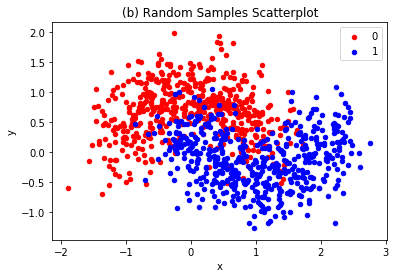

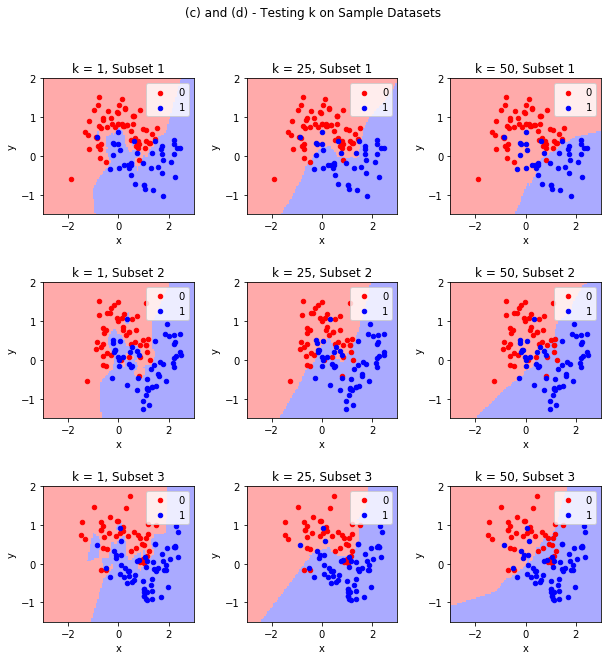

In [295]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# (a) Create synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.35)

# (b) Scatterplot the random samples
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax.set_title('(b) Random Samples Scatterplot')
plt.show()

# (c) Create subsets
sub1select = np.random.randint(0, np.shape(X)[0], [100])
sub2select = np.random.randint(0, np.shape(X)[0], [100])
sub3select = np.random.randint(0, np.shape(X)[0], [100])

sub1X, sub1y = X[sub1select], y[sub1select]
sub2X, sub2y = X[sub2select], y[sub2select]
sub3X, sub3y = X[sub3select], y[sub3select]

xx, yy = np.meshgrid( np.linspace(-3, 3, 100), np.linspace(-1.5, 2.5, 100))
Xtest = np.array([np.ravel(xx), np.ravel(yy)]).T
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])


def knncombo(thisX, thisy, thisk):
    neigh = KNeighborsClassifier(n_neighbors=thisk)
    neigh.fit(thisX, thisy)
    yhat = neigh.predict(Xtest)
    yhat = yhat.reshape(xx.shape)
    return yhat
    
plt.figure(figsize=(10, 10))
plt.suptitle('(c) and (d) - Testing k on Sample Datasets')
knums = np.array([1, 25, 50])
allsubX = [sub1X, sub2X, sub3X]
allsuby = [sub1y, sub2y, sub3y]
i = 1


for j, subX in enumerate(allsubX):
    for k in knums:
        ax = plt.subplot(3, 3, i)
        plt.pcolormesh(xx, yy, knncombo(subX, allsuby[j], k), cmap=cmap_light)
        df = pd.DataFrame(dict(x=subX[:,0], y=subX[:,1], label=allsuby[j]))
        colors = {0:'red', 1:'blue'}
        grouped = df.groupby('label')
        for key, group in grouped:
            group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
        ax.set_title('k = {}, Subset {}'.format(k, j+1))
        plt.ylim(-1.5, 2)
        plt.xlim(-3, 3)
        i = i+1
    
plt.subplots_adjust(hspace=0.5, wspace=0.35)
plt.show()

**ANSWER**

**(a)** See code above.

**(b)** See scatterplot above.

**(c)** See code above.

**(d)** See scatterplots above.

**(e)** The rows vary in that each row represents a different randomly selected sample of the dataset.  However, the three random datasets are relatively similar to each other.  There are no distinct differences between the datasets in each row.  The columns represent different values of k.  The first column with k=1 has the most flexible decision boundary.  All points are correctly classified by the decision boundary, a property that is always true when k=1.  It varies the most as the data changes.  The k=1 decision boundary will likely not generalize well for other random samples.  The k=25 decision boundary in the second column, although it makes some errors, does a good job separating the two classes yet will generalize better than the k=1 decision boundary.  The k=50 decision boundary in the third column has a higher bias and thus does not do as good of a job separating the two classes.


**(f)** The bias-variance tradeoff is the idea that the mean squared error of a model has two reducible error terms: the variance and the bias.  The tradeoff is that a model with low bias has a high variance and a model with low variance has high bias.  This can be seen in the plots above.  The models with k=1 have low bias because the models fit the data points perfectly.  However, they have high variance because they vary widely with different data points.  The models with k=50 have low variance because they do not change drastically based on the data points.  However, they have a high bias because they are more general models.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...,500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

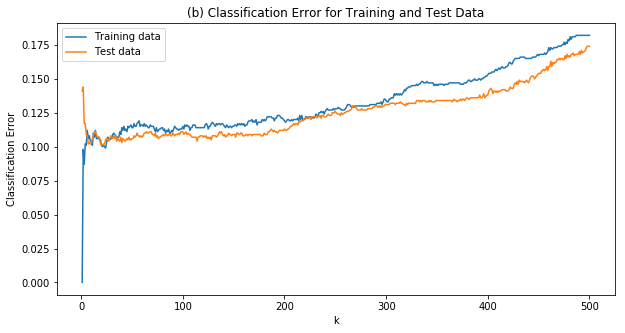

In [298]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# (a) Create test set
train = {'X':X, 'y':y}
testX, testy = make_moons(n_samples=1000, noise=0.35)
test = {'X':testX, 'y':testy}

def knncombo(thisX, thisy, thistesttrain, thistesttest, thisk):
    neigh = KNeighborsClassifier(n_neighbors=thisk)
    neigh.fit(thisX, thisy)
    yhattrain = neigh.predict(thistesttrain)
    yhattest = neigh.predict(thistesttest)
    return np.ravel(yhattrain), np.ravel(yhattest)

def calcerror(y, y_hat):
        nvalues = len(y)
        y = np.squeeze(y)
        accuracy = sum(y == y_hat) / nvalues
        return float(1-accuracy)

'''
errors = np.zeros(500, dtype=[('k','i4'), ('trainerror','f4'), ('testerror','f4')])    
for k in np.arange(1, 500+1):
    yhattrain, yhattest = knncombo(train['X'], train['y'], train['X'], test['X'], k)
    trainerror = calcerror(train['y'], yhattrain)
    testerror = calcerror(test['y'], yhattest)
    errors[k-1]=(k, trainerror, testerror)
    #store k, trainerror, testerror datastructure
'''

# print(errors['k'][errors['testerror']==np.min(errors['testerror'])])
plt.figure(figsize=(10, 5))
plt.title('(b) Classification Error for Training and Test Data')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.plot(errors['k'], errors['trainerror'], label='Training data')
plt.plot(errors['k'], errors['testerror'], label='Test data')
plt.legend()
plt.show()



**ANSWER**

**(a)** See code above.

**(b)** See figure above.

**(c)** For the training data, the classification error is zero at k=1, but sharply increases until approximately k=50.  For the test data, the classification error is large at k=1 but sharply decreases until approximately k=50.  Then, the classification error steadily increases until k=500, with the training data set error slightly higher than the test data set error.

**(d)** High values of $k$ represent high bias and low values of $k$ represent high variance.

**(e)** The optimal value of $k$ is the value at which the classification error for the test data set is minimized.  In the data shown above, the optimal value is $k = 21$.

**(f)** In other models, the flexibility is controlled by the choice of the model function $f\hat(X)$.  If the model has a very linear relationship with few parameters, it will not be very flexible.  On the other hand, if the model has a non-linear relationship with many parameters, it will have more flexibility.


## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

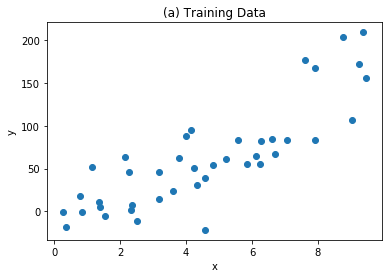

(b) The linear regression model for the training data is y = -21.7308 + 18.3032x
    R^2 = 0.7015
    MSE = 1052.5854

(c) The multiple linear regression model for the training data is y = 8.0073 + 0.4710x + 1.8321x^2
    R^2 = 0.7490
    MSE = 884.7978


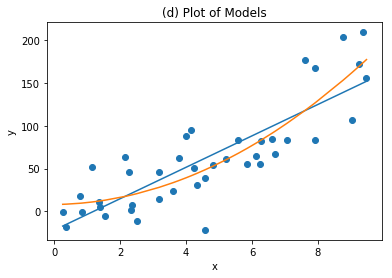

(e) Statistics for simple linear regression model on test data:
    R^2 = 0.5556
    MSE = 2023.3121

    Statistics for multiple regression model on test data:
    R^2 = 0.6928
    MSE = 1398.8818



In [279]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

order = np.argsort(x_train)
x_train = np.array(x_train)[order]
y_train = np.array(y_train)[order]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

# (a) Create a scatter plot of training data
plt.figure()
plt.scatter(x_train, y_train)
plt.title('(a) Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# (b) Linear Regression Model for training data
lr = linear_model.LinearRegression()
lr.fit(np.reshape(x_train, (-1, 1)), np.reshape(y_train, (-1, 1)))
y_train_predict = lr.predict(np.reshape(x_train, (-1, 1)))

a1 = (lr.coef_)
a0 = (lr.intercept_)
r2 = (r2_score(np.reshape(y_train, (-1, 1)), y_train_predict))
mse = (mean_squared_error(np.reshape(y_train, (-1, 1)), y_train_predict))
print('(b) The linear regression model for the training data is y = {:.4f} + {:.4f}x'.format(a0[0], a1[0][0]))
print('    R^2 = {:.4f}'.format(r2))
print('    MSE = {:.4f}\n'.format(mse))

# (c) Multiple Regression Model
x_train2 = np.square(x_train)
lr2 = linear_model.LinearRegression()
x_mrm = np.column_stack((np.ravel(x_train), np.ravel(x_train2)))
lr2.fit(x_mrm, np.reshape(y_train, (-1, 1)))
y_train_predict_mrm = lr2.predict(x_mrm)

a1_mrm = (lr2.coef_)
a0_mrm = (lr2.intercept_)
r2_mrm = (r2_score(np.reshape(y_train, (-1, 1)), y_train_predict_mrm))
mse_mrm = (mean_squared_error(np.reshape(y_train, (-1, 1)), y_train_predict_mrm))
print('(c) The multiple linear regression model for the training data is '\
            'y = {:.4f} + {:.4f}x + {:.4f}x^2'.format(a0_mrm[0], a1_mrm[0][0], a1_mrm[0][1]))
print('    R^2 = {:.4f}'.format(r2_mrm))
print('    MSE = {:.4f}'.format(mse_mrm))

# (d) Plot Models

plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_predict)
plt.plot(np.reshape(x_train, (-1, 1)), y_train_predict_mrm)

plt.title('(d) Plot of Models')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# (e) Apply to Test data
y_test_predict = lr.predict(np.reshape(x_test, (-1, 1)))
r2_test = r2_score(np.reshape(y_test, (-1, 1)), y_test_predict)
mse_test = mean_squared_error(np.reshape(y_test, (-1, 1)), y_test_predict)

x_test2 = np.square(x_test)
x_test_mrm = np.column_stack((np.ravel(x_test), np.ravel(x_test2)))

y_test_predict_mrm = lr2.predict(x_test_mrm)
r2_test_mrm = r2_score(np.reshape(y_test, (-1, 1)), y_test_predict_mrm)
mse_test_mrm = mean_squared_error(np.reshape(y_test, (-1, 1)), y_test_predict_mrm)

print('(e) Statistics for simple linear regression model on test data:')
print('    R^2 = {:.4f}'.format(r2_test))
print('    MSE = {:.4f}\n'.format(mse_test))
print('    Statistics for multiple regression model on test data:')
print('    R^2 = {:.4f}'.format(r2_test_mrm))
print('    MSE = {:.4f}\n'.format(mse_test_mrm))



**ANSWER**

**(a)** See output above.

**(b)** See output above.

**(c)** See output above.

**(d)** See output above.

**(e)** See output above.

**(f)** The multiple regression model performs best on both the training data and the test data.  This is because the multiple regression model is more flexible than a simple regression model.  It has an additional parameter so it can better fit the training.  However, it is not an overly flexible model.  It still performs well on the test data, too.

**(g)** If the test data were significantly different from the training data, the predictive capability of the model would decrease.  This is because the model is fit to the training data for the purpose of predicting unknown data.  Fitting a model to training data and then using that model to make predictions on test data that significantly differs from the training data is counterintuitive.  